In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
import bs4
import time 
import re 

In [136]:
shopee_product = pd.read_csv("shopee_product")
df_shopee = shopee_product.drop(columns=["web-scraper-order", "web-scraper-start-url"])

#ทำงานใน df_shopee coppy จาก shopee_product 
df_shopee = df_shopee.rename(columns={'name': 'Product','price':'Price','sold':'Quantity','provice':'Address'})
df_shopee 

,Product,Price,Quantity,Address
0,Calpis คาลพิส แลคโตะ โซดา กลิ่นพีชซากุระ 245 ม...,฿360,ขายแล้ว 1.8พัน ชิ้น,จังหวัดสมุทรปราการ
1,ดอยคำ โรสแอนด์เบอร์รี 130 กรัม (2 หลอด),฿76,ขายแล้ว 186 ชิ้น,จังหวัดปทุมธานี
2,ข้าวขาวหอมมะลิ ข้าวออร์แกนิคปลอดสารพิษ ช้าวสุร...,฿10฿15-33%,ขายแล้ว 26.4พัน ชิ้น,จังหวัดสุรินทร์
3,พายไส้ผลไม้ 6 รส (ห่อ9ชิ้น) มีส่งแบบด่วน กรอบน...,฿19฿20-5%,ขายแล้ว 54.7พัน ชิ้น,จังหวัดกรุงเทพมหานคร
4,วุ้นเส้นหมูกระทะ วุ้นเส้นเหนียวนุ่ม ขนาด1กิโลอ...,฿97,ขายแล้ว 1.7พัน ชิ้น,จังหวัดลำพูน
...,...,...,...,...
6742,[แพ็กคู่สุดคุ้ม] ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ ...,"฿1,159฿1,598-27%",ขายแล้ว 15.3พัน ชิ้น,จังหวัดสมุทรปราการ
6743,Dr.PONG 15C ANTIOXIDANT VITAMIN C SHAKE SHAKE ...,"฿379฿1,000-62%",ขายแล้ว 12พัน ชิ้น,จังหวัดกรุงเทพมหานคร
6744,HERBITAGE BE-BARRIER 24.7 Restoring Serum,฿490฿890-45%,ขายแล้ว 8.4พัน ชิ้น,จังหวัดนนทบุรี
6745,SKINTIFIC ครีมทาฝ้า Symwhite 377 มอยเจอร์ไรเซอ...,฿369฿699-47%,ขายแล้ว 805 ชิ้น,จังหวัดสมุทรปราการ


In [138]:
df_shopee['Address'] = df_shopee['Address'].str.replace('จังหวัด', '')

df_shopee["Price"] = df_shopee["Price"].str.replace(r"\d+%", "", regex=True)
df_shopee["Price"] = df_shopee["Price"].str.replace(r"-", "", regex=True)

df_shopee

,Product,Price,Quantity,Address
0,Calpis คาลพิส แลคโตะ โซดา กลิ่นพีชซากุระ 245 ม...,฿360,ขายแล้ว 1.8พัน ชิ้น,สมุทรปราการ
1,ดอยคำ โรสแอนด์เบอร์รี 130 กรัม (2 หลอด),฿76,ขายแล้ว 186 ชิ้น,ปทุมธานี
2,ข้าวขาวหอมมะลิ ข้าวออร์แกนิคปลอดสารพิษ ช้าวสุร...,฿10฿15,ขายแล้ว 26.4พัน ชิ้น,สุรินทร์
3,พายไส้ผลไม้ 6 รส (ห่อ9ชิ้น) มีส่งแบบด่วน กรอบน...,฿19฿20,ขายแล้ว 54.7พัน ชิ้น,กรุงเทพมหานคร
4,วุ้นเส้นหมูกระทะ วุ้นเส้นเหนียวนุ่ม ขนาด1กิโลอ...,฿97,ขายแล้ว 1.7พัน ชิ้น,ลำพูน
...,...,...,...,...
6742,[แพ็กคู่สุดคุ้ม] ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ ...,"฿1,159฿1,598",ขายแล้ว 15.3พัน ชิ้น,สมุทรปราการ
6743,Dr.PONG 15C ANTIOXIDANT VITAMIN C SHAKE SHAKE ...,"฿379฿1,000",ขายแล้ว 12พัน ชิ้น,กรุงเทพมหานคร
6744,HERBITAGE BE-BARRIER 24.7 Restoring Serum,฿490฿890,ขายแล้ว 8.4พัน ชิ้น,นนทบุรี
6745,SKINTIFIC ครีมทาฝ้า Symwhite 377 มอยเจอร์ไรเซอ...,฿369฿699,ขายแล้ว 805 ชิ้น,สมุทรปราการ


In [139]:
df_shopee["Price"] = df_shopee["Price"].str.split("฿").apply(lambda x: x[1] if len(x) == 2 else x[-1])
# df_shopee = df_shopee.drop(columns=["price"])
# df_shopee = df_shopee.rename(columns={"cleaned_price": "price"})
df_shopee

,Product,Price,Quantity,Address
0,Calpis คาลพิส แลคโตะ โซดา กลิ่นพีชซากุระ 245 ม...,360,ขายแล้ว 1.8พัน ชิ้น,สมุทรปราการ
1,ดอยคำ โรสแอนด์เบอร์รี 130 กรัม (2 หลอด),76,ขายแล้ว 186 ชิ้น,ปทุมธานี
2,ข้าวขาวหอมมะลิ ข้าวออร์แกนิคปลอดสารพิษ ช้าวสุร...,15,ขายแล้ว 26.4พัน ชิ้น,สุรินทร์
3,พายไส้ผลไม้ 6 รส (ห่อ9ชิ้น) มีส่งแบบด่วน กรอบน...,20,ขายแล้ว 54.7พัน ชิ้น,กรุงเทพมหานคร
4,วุ้นเส้นหมูกระทะ วุ้นเส้นเหนียวนุ่ม ขนาด1กิโลอ...,97,ขายแล้ว 1.7พัน ชิ้น,ลำพูน
...,...,...,...,...
6742,[แพ็กคู่สุดคุ้ม] ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ ...,"1,598",ขายแล้ว 15.3พัน ชิ้น,สมุทรปราการ
6743,Dr.PONG 15C ANTIOXIDANT VITAMIN C SHAKE SHAKE ...,"1,000",ขายแล้ว 12พัน ชิ้น,กรุงเทพมหานคร
6744,HERBITAGE BE-BARRIER 24.7 Restoring Serum,890,ขายแล้ว 8.4พัน ชิ้น,นนทบุรี
6745,SKINTIFIC ครีมทาฝ้า Symwhite 377 มอยเจอร์ไรเซอ...,699,ขายแล้ว 805 ชิ้น,สมุทรปราการ


In [140]:
df_shopee["Quantity"] = df_shopee["Quantity"].str.replace("ขายแล้ว", "").str.replace(" ชิ้น", "").str.replace(".", "").str.replace("พัน", "00")
df_shopee

,Product,Price,Quantity,Address
0,Calpis คาลพิส แลคโตะ โซดา กลิ่นพีชซากุระ 245 ม...,360,1800,สมุทรปราการ
1,ดอยคำ โรสแอนด์เบอร์รี 130 กรัม (2 หลอด),76,186,ปทุมธานี
2,ข้าวขาวหอมมะลิ ข้าวออร์แกนิคปลอดสารพิษ ช้าวสุร...,15,26400,สุรินทร์
3,พายไส้ผลไม้ 6 รส (ห่อ9ชิ้น) มีส่งแบบด่วน กรอบน...,20,54700,กรุงเทพมหานคร
4,วุ้นเส้นหมูกระทะ วุ้นเส้นเหนียวนุ่ม ขนาด1กิโลอ...,97,1700,ลำพูน
...,...,...,...,...
6742,[แพ็กคู่สุดคุ้ม] ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ ...,"1,598",15300,สมุทรปราการ
6743,Dr.PONG 15C ANTIOXIDANT VITAMIN C SHAKE SHAKE ...,"1,000",1200,กรุงเทพมหานคร
6744,HERBITAGE BE-BARRIER 24.7 Restoring Serum,890,8400,นนทบุรี
6745,SKINTIFIC ครีมทาฝ้า Symwhite 377 มอยเจอร์ไรเซอ...,699,805,สมุทรปราการ


In [141]:
df_shopee["Quantity"] = df_shopee["Quantity"].str.replace(",", "")
df_shopee

,Product,Price,Quantity,Address
0,Calpis คาลพิส แลคโตะ โซดา กลิ่นพีชซากุระ 245 ม...,360,1800,สมุทรปราการ
1,ดอยคำ โรสแอนด์เบอร์รี 130 กรัม (2 หลอด),76,186,ปทุมธานี
2,ข้าวขาวหอมมะลิ ข้าวออร์แกนิคปลอดสารพิษ ช้าวสุร...,15,26400,สุรินทร์
3,พายไส้ผลไม้ 6 รส (ห่อ9ชิ้น) มีส่งแบบด่วน กรอบน...,20,54700,กรุงเทพมหานคร
4,วุ้นเส้นหมูกระทะ วุ้นเส้นเหนียวนุ่ม ขนาด1กิโลอ...,97,1700,ลำพูน
...,...,...,...,...
6742,[แพ็กคู่สุดคุ้ม] ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ ...,"1,598",15300,สมุทรปราการ
6743,Dr.PONG 15C ANTIOXIDANT VITAMIN C SHAKE SHAKE ...,"1,000",1200,กรุงเทพมหานคร
6744,HERBITAGE BE-BARRIER 24.7 Restoring Serum,890,8400,นนทบุรี
6745,SKINTIFIC ครีมทาฝ้า Symwhite 377 มอยเจอร์ไรเซอ...,699,805,สมุทรปราการ


In [143]:
# สร้างฟังก์ชันเพื่อตรวจสอบคำในคอลัมน์ Product
def check_category(product):
    fashion_keywords = ['แฟชั่น', 'เสื้อ', 'กางเกง', 'รองเท้า', 'กระเป๋า', 'ถุงเท้า', 'หมวก', 
                        'สร้อย', 'กำไล', 'ต่างหู', 'แว่น', 'แหวน', 'ถุงมือ', 'เดรส', 'ถุงน่อง', 'เข็มขัด', 'ยีนส์', 'ชุดสตรี']
    electronics_keywords = ['มือถือ', 'เครื่องใช้ไฟฟ้า', 'mobile', 'phone', 'Sumsung', 'sumsung', 
                            'โทรศัพท์', 'xiaomi', 'redmi', 'infinix', 'nokia', 'ไฟฟ้า', 'ไร้สาย', 
                            'หุ่นยนต์', 'พัดลม', 'เครื่องซักผ้า', 'เครื่องอบ', 'เครื่องทำ', 
                            'เครื่องปั่น','ไดร์', 'หม้อหุงข้าว', 'หลอดไฟ', 'หม้ออบลมร้อน', 'สายไฟ']
    
    beauty_keywords = ['ลิป', 'เครื่องสำอาง', 'อายแชโดว์', 'คอนซีลเลอร์', 'บรัชออน', 'ดินสอเขียนขอบตา', 
                       'แต่งหน้า', 'รองพื้น', 'คลีนซิ่ง', 'ดัดขนตา', 'แมท', 'อายไลเนอร์', 'เมคอัพ', 
                       'makeup', 'Makeup', 'แป้ง', 'คอนแทคเลนส์', 'บลัชออน', 'โทนอัพครีม', 'คอนทัวร์', 'Lip', 'Match', 'บลัช'
                       , 'ปัดแก้ม', 'ไฮไลท์​หน้าเงา', 'ไฮไลท์', 'ครีมกันแดด', 'มาสคาร่า', 'เซรั่ม', 'สบู่', 'แชมพู', 'แอคเน่', 'ทรีทเม้นท์',
                       'ครีม','Moisture','Centella','Serum','HERBITAGE','มอยส์เจอร์ไรเซอร์','Lotion','MizuMi','Essence','Treatment','สกิน'
                       ,"Paula's",'สกินแคร์ ','Naturista','มอยส์','SKINTIFIC','เซราไมด์','บาเรียร์', 'anti-acne oil control',  'cream lotion' 
                        ,'body lotion','SOOTHING', 'MOISTURE', 'ALOE' ,'ศิริราชซอฟท์แคร์' ,'Soft Care', 'VIKKASKINCARE', 'LOTION', 'Sensitive Skin', 'Moisturizing Repair'
                       , 'Advanced Repair','Repair','วิตามิน','เจล', 'กันแดด', 'Dr.PONG', 'Whitening', 'acne', 'MadeCera', 'SKINRx LAB',
                       'ลดลอย', 'สิว','Skinsista', 'Vit C', 'Vit C+', 'Coreana Ample', 'Coreana', 'FACE', 'CREAM', 'SEWA', 'น้ำตบ',
                      'Calming Gel','Cream','CeraVe','Moisturising','La Roche-Posay','INGU','มอยซ์เจอร์ไรเซอร์','จุฬาเฮิร์บ',"Jula's Herb",'CURECODE NEUROMIDE AMPOULE',
                      'Toner', 'Acne', 'Clear Nose', 'ไวท์เทนนิ่ง', 'La Roche Posay','มอยเจอร์ไรเซอร์' ,'เติมความชุ่มชื้น' ,'ความชุ่มชื้น', 'Skin Skin', 'Conditioner Ampoule'
                       ,'Lancome','นูโทรจีนา', 'Vitamin C+', 'SKIN', 'CARE', 'Skin', 'Conditioner', 'Ampoule','มิราเคิล', 'Graymelin', 'Galactomyces', 'มอยซ์เจอไรซิ่ง', 'โลชั่น', 'Botaya herb',
                       'มอยซ์เจอไรซิ่ง', 'โกตู']
    
    health_keywords = ['สุขภาพ', 'เสริมอาหาร', 'กลูต้า','เพื่อสุขภาพ', 'อาหารเสริม', 'อาหารคลีน', 'ผลิตภัณฑ์เพื่อสุขภาพ', 'ออร์แกนิค',
                        'ยาสมุนไพร', 'การนอนหลับ', 'ควบคุมน้ำหนัก', 'ฮอร์โมน']
    
    sport_keywords = ['กีฬา', 'การออกกำลังกาย', 'การยกน้ำหนัก', 'เสื้อกีฬา', 'รองเท้าวิ่ง', 'รองเท้าฟุตบอล', 'เครื่องออกกำลังกาย', 'อุปกรณ์กีฬา']
    
    home_keywords = ['เครื่องใช้ในบ้าน', 'เฟอร์นิเจอร์', 'โคมไฟ', 'โต๊ะ', 'เก้าอี้', 'ตู้เสื้อผ้า', 'ชุดห้องนอน', 'เครื่องปรับอากาศ','ช้อน', 'ไม้จิ้มฟัน', 'ทิชชู่']
    
    personal_care_keywords = ['ของใช้ส่วนตัว', 'เครื่องประดับ', 'แว่นตา', 'น้ำหอม', 'ผลิตภัณฑ์ทำความสะอาด', 'ผลิตภัณฑ์บำรุงผิว']
    
    food_keywords = ['อาหาร', 'ขนม', 'เครื่องดื่ม', 'ผลิตภัณฑ์เกษตร', 'อาหารจานเดียว', 'ขนมปัง', 'ผลไม้','คาลพิส','ดอยคำ','วุ้นเส้นหมูกระทะ','บะหมี่','ไส้กรอก',
                    'นม','เส้น','ไมโล','เค้ก','สปาเก็ตตี้','ชีสบอล','ซีอิ๊ว','ซอส','ข้าว','ไส้อั่ว','กุ้ง','ปลา','ตัวใหญ่','ตัวใหญ่',
                    'อาหาร', 'ไข่' ,'ต้มสุก' ,'แช่แข็ง', 'หมึก', 'ตัวเล็ก' ,'หมู' ,'ไก่' ,'เนื้อ' ,'สดใหม่', 'มะขาม', 'ผลไม้', 'ไร้เมล็ด','เกลือ','ไฮคิว',
                     'น้ำส้ม', 'น้ำ', 'รังผึ้ง', 'Cornflake' ,'คอนเฟลก', 'ฟองเต้าหู้',  'เพียวฟู้ดส์', 'ชาบู', 'น้ำดำ' ,'น้ำใส', 'ต้มยำ','HOT POT','อุด้ง', 'หม้อไฟ'
                     , 'อาหารกึ่งสำเร็จรูป', 'อาหารสำเร็จรูป', 'โอวัลติน', 'บราวนี่', 'มันฝรั่ง', 'คุกกี้', 'คีโต','ปังเนยหนึบ', 'ส้มตำ', 'ป๊อปคอร์น', 'ป๊อกกี้', 'สตรอเบอร์รี',
                    'งา', 'คั่วบด', 'รากบัวธัญพืช', 'ถั่ว','กาละแม' ,'กะหรี่ปั๊บ', 'ไส้','แลคตาซอย', 'Peptein','เปปทีน','แฮมกระป๋องเกาหลี',  'กระป๋อง', 'กานาฉ่ายเห็ดหอม', 'ครัวดีเยี่ยม',
                     'เห็ด']
    
    jewelry_keywords = ['เครื่องประดับ', 'ต่างหู', 'สร้อยคอ', 'แหวน']
    
    furniture_keywords = ['เฟอร์นิเจอร์', 'โต๊ะ', 'เก้าอี้', 'ตู้เสื้อผ้า', 'เตียง', 'ตู้เย็น', 'ตู้เสื้อผ้า', 'โซฟา']

    for keyword in fashion_keywords:
        if keyword in product:
            return 'แฟชั่น'

    for keyword in electronics_keywords:
        if keyword in product:
            return 'มือถือและเครื่องใช้ไฟฟ้า'

    for keyword in beauty_keywords:
        if keyword in product:
            return 'ความงาม'

    for keyword in health_keywords:
        if keyword in product:
            return 'สินค้าเพื่อสุขภาพ'

    for keyword in sport_keywords:
        if keyword in product:
            return 'กีฬาและนันทนาการกลางแจ้ง'

    for keyword in home_keywords:
        if keyword in product:
            return 'เครื่องใช้ในบ้าน'

    for keyword in personal_care_keywords:
        if keyword in product:
            return 'ของใช้ส่วนตัวและเครื่องประดับ'

    for keyword in food_keywords:
        if keyword in product:
            return 'อาหาร'

    for keyword in jewelry_keywords:
        if keyword in product:
            return 'เครื่องประดับ'

    for keyword in furniture_keywords:
        if keyword in product:
            return 'เฟอร์นิเจอร์'
            
    return ''

# สร้าง column ใหม่ 'ประเภท' โดยใช้ฟังก์ชันเพื่อตรวจสอบคำใน column 'Product'
df_shopee['Type'] = df_shopee['Product'].apply(check_category)

df_shopee


,Product,Price,Quantity,Address,Type
0,Calpis คาลพิส แลคโตะ โซดา กลิ่นพีชซากุระ 245 ม...,360,1800,สมุทรปราการ,อาหาร
1,ดอยคำ โรสแอนด์เบอร์รี 130 กรัม (2 หลอด),76,186,ปทุมธานี,อาหาร
2,ข้าวขาวหอมมะลิ ข้าวออร์แกนิคปลอดสารพิษ ช้าวสุร...,15,26400,สุรินทร์,สินค้าเพื่อสุขภาพ
3,พายไส้ผลไม้ 6 รส (ห่อ9ชิ้น) มีส่งแบบด่วน กรอบน...,20,54700,กรุงเทพมหานคร,อาหาร
4,วุ้นเส้นหมูกระทะ วุ้นเส้นเหนียวนุ่ม ขนาด1กิโลอ...,97,1700,ลำพูน,อาหาร
...,...,...,...,...,...
6742,[แพ็กคู่สุดคุ้ม] ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ ...,"1,598",15300,สมุทรปราการ,ความงาม
6743,Dr.PONG 15C ANTIOXIDANT VITAMIN C SHAKE SHAKE ...,"1,000",1200,กรุงเทพมหานคร,ความงาม
6744,HERBITAGE BE-BARRIER 24.7 Restoring Serum,890,8400,นนทบุรี,ความงาม
6745,SKINTIFIC ครีมทาฝ้า Symwhite 377 มอยเจอร์ไรเซอ...,699,805,สมุทรปราการ,ความงาม


In [144]:
len(df_shopee[df_shopee['Type']==''])

1643

In [145]:
df_shopee = df_shopee[df_shopee['Type'] != '']
df_shopee = df_shopee.sort_values(by='Address')

df_shopee

,Product,Price,Quantity,Address,Type
6251,Medmaker Vitamin E Cream เมดเมคเกอร์ วิตามินอี...,57,700,กระบี่,ความงาม
6603,Tomei Facial Moisturizer โทเมอิ เฟเชียล มอยเจอ...,139,5700,กระบี่,ความงาม
2592,กล่องอาหารกลางวัน กล่องเก็บอาหาร ทนความร้อน เข...,16,18100,กรุงเทพมหานคร,อาหาร
2594,กล่องข้าวฟางข้าวสาลี พร้อมอุปกรณ์ช้อนตะเกียบสแ...,51,9100,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
2595,(รหัส s12)50 ใบ ซองซิปล็อคเนื้อด้าน ถุงซิปล็อก...,45,24400,กรุงเทพมหานคร,อาหาร
...,...,...,...,...,...
4331,Feiyana-ผ้าคลุมเก้าอี้ป้องกันการเปรอะเปื้อน ผ้...,69ขายแล้ว 2.1พัน ชิ้น,2100,NaN,เครื่องใช้ในบ้าน
4332,ใหม่ สายรัดกระเป๋าเดินทาง ปรับได้ หลายสี สายรั...,20ขายแล้ว 404 ชิ้น,404,NaN,แฟชั่น
4333,ต่างหูเงิน เกรด S925 ทรงกลม แต่งสายโซ่ 2022,29ขายแล้ว 2.3พัน ชิ้น,2300,NaN,แฟชั่น
4334,[พร้อมส่งทันที] 6สี..กิ๊ฟแฟชั่น กิ๊ฟเกาหลี กิ๊...,2ขายแล้ว 2.3พัน ชิ้น,2300,NaN,แฟชั่น


In [146]:
#check provice null 
df_shopee[df_shopee['Address'].isna()]
df_shopee = df_shopee.dropna(subset=['Address'])

df_shopee

,Product,Price,Quantity,Address,Type
6251,Medmaker Vitamin E Cream เมดเมคเกอร์ วิตามินอี...,57,700,กระบี่,ความงาม
6603,Tomei Facial Moisturizer โทเมอิ เฟเชียล มอยเจอ...,139,5700,กระบี่,ความงาม
2592,กล่องอาหารกลางวัน กล่องเก็บอาหาร ทนความร้อน เข...,16,18100,กรุงเทพมหานคร,อาหาร
2594,กล่องข้าวฟางข้าวสาลี พร้อมอุปกรณ์ช้อนตะเกียบสแ...,51,9100,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
2595,(รหัส s12)50 ใบ ซองซิปล็อคเนื้อด้าน ถุงซิปล็อก...,45,24400,กรุงเทพมหานคร,อาหาร
...,...,...,...,...,...
82,แคบหมูแผ่น กรอบอร่อยไร้มัน! ถุงใหญ่จุใจ35฿!! ท...,35,700,แพร่,อาหาร
697,📌 เมนู น้ำพริกกากหมู/กากหมูคั่วพริก กร๊อบกรอบ ...,69,21700,แพร่,อาหาร
245,1kg. หนังไก่ทอดกรอบ(ทอดเกลือ) กรอบอร่อยทานเพลิ...,99,6600,แพร่,อาหาร
70,[ลูกค้าใหม่ 1 บาท] 🐝 รวงผึ้ง รังผึ้งสด พิเศษชิ...,75,1900,แพร่,อาหาร


In [147]:
df_shopee = df_shopee.reset_index(drop=True)
df_shopee

,Product,Price,Quantity,Address,Type
0,Medmaker Vitamin E Cream เมดเมคเกอร์ วิตามินอี...,57,700,กระบี่,ความงาม
1,Tomei Facial Moisturizer โทเมอิ เฟเชียล มอยเจอ...,139,5700,กระบี่,ความงาม
2,กล่องอาหารกลางวัน กล่องเก็บอาหาร ทนความร้อน เข...,16,18100,กรุงเทพมหานคร,อาหาร
3,กล่องข้าวฟางข้าวสาลี พร้อมอุปกรณ์ช้อนตะเกียบสแ...,51,9100,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
4,(รหัส s12)50 ใบ ซองซิปล็อคเนื้อด้าน ถุงซิปล็อก...,45,24400,กรุงเทพมหานคร,อาหาร
...,...,...,...,...,...
5089,แคบหมูแผ่น กรอบอร่อยไร้มัน! ถุงใหญ่จุใจ35฿!! ท...,35,700,แพร่,อาหาร
5090,📌 เมนู น้ำพริกกากหมู/กากหมูคั่วพริก กร๊อบกรอบ ...,69,21700,แพร่,อาหาร
5091,1kg. หนังไก่ทอดกรอบ(ทอดเกลือ) กรอบอร่อยทานเพลิ...,99,6600,แพร่,อาหาร
5092,[ลูกค้าใหม่ 1 บาท] 🐝 รวงผึ้ง รังผึ้งสด พิเศษชิ...,75,1900,แพร่,อาหาร


In [148]:
df_shopee.dtypes


Product     object
Price       object
Quantity    object
Address     object
Type        object
dtype: object

In [149]:
df_shopee['Quantity'] = df_shopee['Quantity'].astype(int)

ValueError: invalid literal for int() with base 10: ' 16ล้าน'

In [150]:
df_shopee[df_shopee['Quantity']=='nan']

,Product,Price,Quantity,Address,Type


In [151]:
df_shopee.dropna(subset=['Quantity'], inplace=True)


In [152]:
df_shopee = df_shopee[df_shopee['Quantity'] != 'nan']
df_shopee[df_shopee['Quantity']=='nan']


,Product,Price,Quantity,Address,Type


In [154]:
# df_shopee.loc[:, 'Quantity'] = df_shopee['Quantity'].astype(int)

rows_to_drop = df_shopee[df_shopee['Quantity'] == ' 16ล้าน'].index

# ลบแถวที่พบจาก DataFrame
df_shopee = df_shopee.drop(rows_to_drop)

In [156]:
rows_to_drop = df_shopee[df_shopee['Quantity'] == ' 11ล้าน'].index

# ลบแถวที่พบจาก DataFrame
df_shopee = df_shopee.drop(rows_to_drop)

In [158]:

rows_to_drop = df_shopee[df_shopee['Quantity'] == ' 12ล้าน'].index

# ลบแถวที่พบจาก DataFrame
df_shopee = df_shopee.drop(rows_to_drop)

In [160]:

rows_to_drop = df_shopee[df_shopee['Quantity'] == ' 18ล้าน'].index

# ลบแถวที่พบจาก DataFrame
df_shopee = df_shopee.drop(rows_to_drop)

In [162]:
rows_to_drop = df_shopee[df_shopee['Quantity'] == ' 15ล้าน'].index

# ลบแถวที่พบจาก DataFrame
df_shopee = df_shopee.drop(rows_to_drop)

In [164]:
rows_to_drop = df_shopee[df_shopee['Quantity'].str.contains('ล้าน')].index
df_shopee = df_shopee.drop(rows_to_drop)

In [169]:

df_shopee['Quantity'] = df_shopee['Quantity'].astype(int)

In [172]:
df_shopee["Price"] = df_shopee["Price"].str.replace(",", "")
df_shopee['Price'] = df_shopee['Price'].astype(int)


In [173]:
df_shopee.dtypes

Product     object
Price        int64
Quantity     int64
Address     object
Type        object
dtype: object

In [18]:
import matplotlib as mpl

# ระบุเส้นทางของไฟล์ฟอนต์ THSarabunChula-Regular.ttf
font_path = "/Users/indierockbadgirl/Desktop/venv/TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf"

# เพิ่มฟอนต์เข้าไปใน FontManager
mpl.font_manager.fontManager.addfont(font_path)

# ตั้งค่าฟอนต์ที่ต้องการใช้
mpl.rc('font', family='TH Sarabun Chula', size=20)

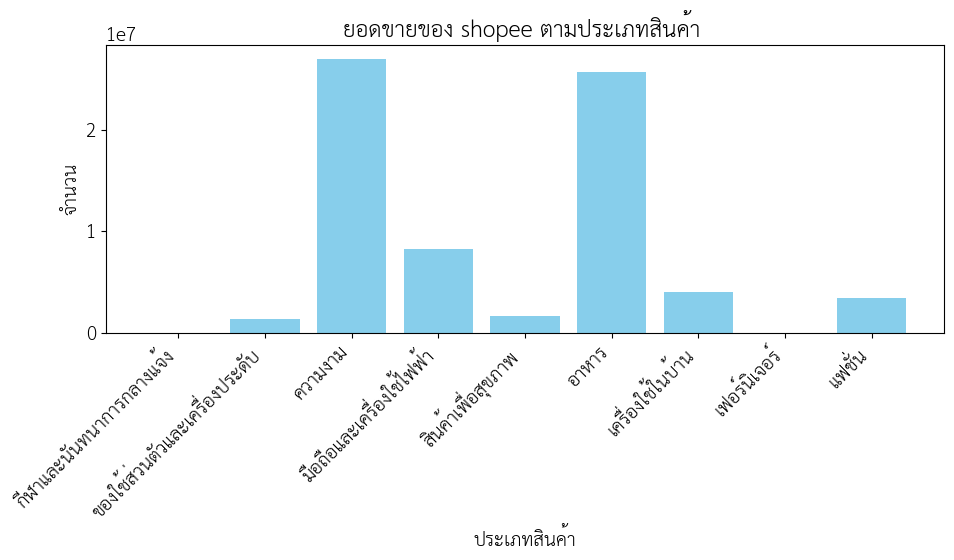

In [175]:
# สร้างกราฟแท่ง
sales_by_type = df_shopee.groupby('Type')['Quantity'].sum().reset_index()

# Data
types = sales_by_type['Type']
sold = sales_by_type['Quantity']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(types, sold, color='skyblue')
plt.xlabel('ประเภทสินค้า')
plt.ylabel('จำนวน')
plt.title('ยอดขายของ shopee ตามประเภทสินค้า ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [176]:
sales_by_type

,Type,Quantity
0,กีฬาและนันทนาการกลางแจ้ง,1510
1,ของใช้ส่วนตัวและเครื่องประดับ,1423000
2,ความงาม,26920587
3,มือถือและเครื่องใช้ไฟฟ้า,8271013
4,สินค้าเพื่อสุขภาพ,1713412
5,อาหาร,25682967
6,เครื่องใช้ในบ้าน,4032027
7,เฟอร์นิเจอร์,30924
8,แฟชั่น,3495792


In [97]:
df_furniture_shopee = df_shopee[df_shopee['Type'] == 'เฟอร์นิเจอร์'].copy()

# รีอินเด็กซ์ใหม่
df_furniture_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_furniture_shopee.to_csv('df_furniture_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_furniture_shopee

,Product,Price,provice,Address,Type
0,เตียงสปานวดตัว พับเก็บได้ โครงสแตนเลส เบาะหนัง...,190,กรุงเทพมหานคร,1985,เฟอร์นิเจอร์
1,บีนแบ็กบอนนี่ บีนแบคโซฟา รุ่นBonnie bean bag บ...,302,กรุงเทพมหานคร,2000,เฟอร์นิเจอร์
2,MAPLE'S(Valla) เบาะสัตว์เลี้ยง2-in-1 ใช้ในรถได...,7500,กรุงเทพมหานคร,358,เฟอร์นิเจอร์
3,Family Spa เฉพาะเตียงคลินิก เตียงเสริมสวยพับได...,461,กรุงเทพมหานคร,7800,เฟอร์นิเจอร์
4,ที่นอนสัตว์เลี้ยง เบาะนอนที่นอน เตียงสุนัขสัตว...,400,กรุงเทพมหานคร,199,เฟอร์นิเจอร์
5,140CM โซฟาห้องนั่งเล่น 1/2/3 ที่นั่ง 3 ระดับ S...,1600,กรุงเทพมหานคร,1899,เฟอร์นิเจอร์
6,140CM โซฟาห้องนั่งเล่น 1/2/3 ที่นั่ง 3 ระดับ S...,1600,กรุงเทพมหานคร,1899,เฟอร์นิเจอร์
7,🔥พร้อมส่ง🔥เตียงพับ เตียงสนาม Shine Trip Foldin...,305,กรุงเทพมหานคร,2600,เฟอร์นิเจอร์
8,ลดราคาโซฟาเป่าลมเลือกสีไม่ได้จับสีเอานะครับ,971,ชลบุรี,119,เฟอร์นิเจอร์
9,พู่ผ้าห่ม สามารถใช้เป็น เสื่อปิกนิก ผ้าคลุมโซฟ...,802,ต่างประเทศ,190,เฟอร์นิเจอร์


In [98]:
df_fashion_shopee = df_shopee[df_shopee['Type'] == 'แฟชั่น'].copy()

# รีอินเด็กซ์ใหม่
df_fashion_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_fashion_shopee.to_csv('df_fashion_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_fashion_shopee

,Product,Price,provice,Address,Type
0,กระเป๋าเก็บอุณหภูมิ อาหารกลางวัน กระเป๋าใส่กล...,3300,กรุงเทพมหานคร,89,แฟชั่น
1,ตะกร้าตากเสื้อผ้าแขวนตากแห้งถุงเท้าชุดชั้นในกา...,100,กรุงเทพมหานคร,99,แฟชั่น
2,กางเกงขายาวลำลอง กางเกงแฟชั่นสำหรับผู้ชาย (สี...,13300,กรุงเทพมหานคร,129,แฟชั่น
3,JJdaily2_Shop ชั้นวางรองเท้า ชั้นวางรองเท้าอเ...,1300,กรุงเทพมหานคร,239,แฟชั่น
4,ชั้นวางรองเท้าเหล็ก U 4 ชั้น *Black*,2600,กรุงเทพมหานคร,179,แฟชั่น
...,...,...,...,...,...
637,เสื้อเชิ้ตลูกฟูก Baystore แขนสั้น🖤พร้อมส่ง ผ้า...,697,เชียงใหม่,250,แฟชั่น
638,ลำลอง เสื้อเชิ้ตแขนสั้น ทรงหลวม ลายดอกไม้ ตาหม...,56,เชียงใหม่,280,แฟชั่น
639,เสื้อเชิ้ตลูกฟูก Baystore แขนยาว🖤พร้อมส่ง ผ้าล...,1700,เชียงใหม่,290,แฟชั่น
640,เสื้อเชิ้ตผู้ชาย สีดำ สีขาว ทำงาน เสื้อเชิ้ตแ...,214,เชียงใหม่,195,แฟชั่น


In [107]:
df_homeUse_shopee = df_shopee[df_shopee['Type'] == 'เครื่องใช้ในบ้าน'].copy()

# รีอินเด็กซ์ใหม่
df_homeUse_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_homeUse_shopee.to_csv('df_homeUse_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_homeUse_shopee

,Product,Price,provice,Address,Type
0,กล่องข้าวฟางข้าวสาลี พร้อมอุปกรณ์ช้อนตะเกียบสแ...,9100,กรุงเทพมหานคร,51,เครื่องใช้ในบ้าน
1,ที่ใส่ช้อน ที่ใส่ตะเกียบ ที่ใส่ช้อนส้อม ชั้นวา...,3500,กรุงเทพมหานคร,128,เครื่องใช้ในบ้าน
2,สปอตไลท์โซล่า โคมไฟโซลาร์เซลล์100W 200W 300W 4...,4300,กรุงเทพมหานคร,199,เครื่องใช้ในบ้าน
3,ถาดคว่ำแก้ว 2 ชั้น ที่คว่ําแก้ว มีตะแกรงรองน้ำ...,6600,กรุงเทพมหานคร,99,เครื่องใช้ในบ้าน
4,"【สินค้าคุณภาพดี】VINIMALL C87 โถแก้วปรุงรส,ขวดป...",7300,กรุงเทพมหานคร,129,เครื่องใช้ในบ้าน
...,...,...,...,...,...
360,สินค้าขายดี**โต๊ะนั่งแบบยาว ขนาด30x100x30 ซม. ...,323,สุโขทัย,450,เครื่องใช้ในบ้าน
361,สินค้าขายดี**โต๊ะนั่งแบบยาว ขนาด30x100x30 ซม. ...,323,สุโขทัย,450,เครื่องใช้ในบ้าน
362,Flextail Tiny Pump 2X เครื่องปั๊มลม แบบแบตเตอร...,104,เชียงใหม่,1100,เครื่องใช้ในบ้าน
363,เก้าอี้ไม้สัก เก้าอีไม้เอนกประสงค์ นั่งซักผ้า ...,2400,แพร่,79,เครื่องใช้ในบ้าน


In [100]:
df_food_shopee = df_shopee[df_shopee['Type'] == 'อาหาร'].copy()

# รีอินเด็กซ์ใหม่
df_food_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_food_shopee.to_csv('df_food_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_food_shopee

,Product,Price,provice,Address,Type
0,กล่องอาหารกลางวัน กล่องเก็บอาหาร ทนความร้อน เข...,18100,กรุงเทพมหานคร,16,อาหาร
1,(รหัส s12)50 ใบ ซองซิปล็อคเนื้อด้าน ถุงซิปล็อก...,24400,กรุงเทพมหานคร,45,อาหาร
2,OKUMI_SHOP กล่องเก็บแปรงสีฟัน เครื่องบีบยาสีฟั...,293,กรุงเทพมหานคร,379,อาหาร
3,พร้อมส่ง ที่วางแปรงสีฟัน ที่กดยาสีฟัน 1ช่อง ที...,5800,กรุงเทพมหานคร,79,อาหาร
4,Jumper Mop ไม้ถูพื้นแบบรีดน้ำ 1 ด้าม พร้อมผ้าไ...,1700,กรุงเทพมหานคร,139,อาหาร
...,...,...,...,...,...
1508,แคบหมูแผ่น กรอบอร่อยไร้มัน! ถุงใหญ่จุใจ35฿!! ท...,700,แพร่,35,อาหาร
1509,📌 เมนู น้ำพริกกากหมู/กากหมูคั่วพริก กร๊อบกรอบ ...,21700,แพร่,69,อาหาร
1510,1kg. หนังไก่ทอดกรอบ(ทอดเกลือ) กรอบอร่อยทานเพลิ...,6600,แพร่,99,อาหาร
1511,[ลูกค้าใหม่ 1 บาท] 🐝 รวงผึ้ง รังผึ้งสด พิเศษชิ...,1900,แพร่,75,อาหาร


In [101]:
df_healthy_shopee = df_shopee[df_shopee['Type'] == 'สินค้าเพื่อสุขภาพ'].copy()

# รีอินเด็กซ์ใหม่
df_healthy_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_healthy_shopee.to_csv('df_healthy_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_healthy_shopee

,Product,Price,provice,Address,Type
0,mixx มิกซ์เอ๊กซ์ เพิ่มเวลาความสุขนกเขา ไม่ ขั...,5,กรุงเทพมหานคร,179,สินค้าเพื่อสุขภาพ
1,AMIGO X2 สูตรใหม่ อาหารเสริมผู้ชาย ปลอดภัยไม่ม...,22,กรุงเทพมหานคร,790,สินค้าเพื่อสุขภาพ
2,อาหารเสริมสมรรภาพทางเพศผู้ชาย ยาอึดทนนานผู้ชาย...,2,กรุงเทพมหานคร,580,สินค้าเพื่อสุขภาพ
3,ส่งฟรี‼️ 4แถม1 แองเยอร์ เพิ่มขนาด ยาอึดทน ชะลอ...,19,กรุงเทพมหานคร,259,สินค้าเพื่อสุขภาพ
4,**พร้อมส่ง** อาหารเสริมผู้ชาย King คิงค์จินเส็...,2,กรุงเทพมหานคร,350,สินค้าเพื่อสุขภาพ
...,...,...,...,...,...
152,ส่งฟรี Start-x (สต๊าทเอ็กซ์) อาหารเสริมผู้ชายพ...,7,อุบลราชธานี,500,สินค้าเพื่อสุขภาพ
153,BNWD MAX-GA | ผลิตภัณฑ์เสริมอาหาร 10 แคปซูล จำ...,5600,อ่างทอง,399,สินค้าเพื่อสุขภาพ
154,ปูอ่องอุ้ยหม่อนเชียงราย🦀🌾มันปูนาออร์แกนิคแท้💯%...,48400,เชียงราย,79,สินค้าเพื่อสุขภาพ
155,ปูอ่องอุ้ยหม่อนเชียงราย🦀🌾มันปูนาออร์แกนิคแท้💯%...,48400,เชียงราย,79,สินค้าเพื่อสุขภาพ


In [102]:
df_electronic_devices_shopee = df_shopee[df_shopee['Type'] == 'มือถือและเครื่องใช้ไฟฟ้า'].copy()

# รีอินเด็กซ์ใหม่
df_electronic_devices_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_electronic_devices_shopee.to_csv('df_electronic_devices_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_electronic_devices_shopee

,Product,Price,provice,Address,Type
0,[ส่งฟรี] มือถือ ออปโป้a83 oppoa83 (6G+128G) ปล...,1600,กรุงเทพมหานคร,2500,มือถือและเครื่องใช้ไฟฟ้า
1,GaGiNang โคมไฟติดผนัง LED โคมไฟหัวเตียง โคมไฟ...,3300,กรุงเทพมหานคร,177,มือถือและเครื่องใช้ไฟฟ้า
2,โคมไฟอ่านหนังสือ LED แบบชาร์จไร้สายและถนอมสายต...,3300,กรุงเทพมหานคร,179,มือถือและเครื่องใช้ไฟฟ้า
3,หลอดไฟ USB 5V 35CM 45CM ดวง ใช้ไฟ พอร์ต USB ...,12300,กรุงเทพมหานคร,80,มือถือและเครื่องใช้ไฟฟ้า
4,โคมไฟกลางคืน LED หมุนได้ 360° เปลี่ยนหลอดไฟได้...,2700,กรุงเทพมหานคร,159,มือถือและเครื่องใช้ไฟฟ้า
...,...,...,...,...,...
1003,Imarflex หม้อหุงข้าว หม้อหุงข้าวไฟฟ้า ขนาด 1...,1200,เชียงราย,520,มือถือและเครื่องใช้ไฟฟ้า
1004,Imarflex เตาย่างไฟฟ้า เครื่องทำทาโกะยากิ รุ่น...,2100,เชียงราย,999,มือถือและเครื่องใช้ไฟฟ้า
1005,Xiaomi Mi Redmi Note 13 5G Dimensity 6080 กล้...,77,เชียงใหม่,9990,มือถือและเครื่องใช้ไฟฟ้า
1006,ซัมซุง มือถือ Galaxy A05s จอใหญ่ แบตเยอะ ชาร์...,1100,เชียงใหม่,5609,มือถือและเครื่องใช้ไฟฟ้า


In [103]:
df_beautiful_shopee = df_shopee[df_shopee['Type'] == 'ความงาม'].copy()

# รีอินเด็กซ์ใหม่
df_beautiful_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_beautiful_shopee.to_csv('df_beautiful_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_beautiful_shopee

,Product,Price,provice,Address,Type
0,Medmaker Vitamin E Cream เมดเมคเกอร์ วิตามินอี...,700,กระบี่,57,ความงาม
1,Tomei Facial Moisturizer โทเมอิ เฟเชียล มอยเจอ...,5700,กระบี่,139,ความงาม
2,ครีมขัดสนิม น้ำยาขัดหม้อดำ ครีมขจัดคราบ ครีมขั...,5100,กรุงเทพมหานคร,26,ความงาม
3,SRICHAND ศรีจันทร์ สกิน มอยส์เจอร์ เบิร์ส เจลค...,39500,กรุงเทพมหานคร,39,ความงาม
4,น้ำตบเห็ด ออริจิน Origins Mega-Mushroom Skin R...,28800,กรุงเทพมหานคร,1800,ความงาม
...,...,...,...,...,...
1331,🥇มีของเลย#ครีมอีแนน🔥ของแท้🌟มีเรทส่ง#ออร่าไวท์บ...,63100,เพชรบุรี,95,ความงาม
1332,ลอรีอัล ปารีส ไกลโคลิค-ไบรท์ อินสแตนท์ โกลว์อิ...,4200,เพชรบูรณ์,202,ความงาม
1333,🚛ส่ง พุธ 6 มีค.🚛 ครีมฮอร์น สูตรครีมหวานน้อย แป...,14200,เพชรบูรณ์,16,ความงาม
1334,พริกทอด ขนมพริกกรอบ พริกทอดกรอบ พริกคั่วงาไม่...,128800,แพร่,45,ความงาม


In [106]:
df_privateUse_shopee = df_shopee[df_shopee['Type'] == 'ของใช้ส่วนตัวและเครื่องประดับ'].copy()

# รีอินเด็กซ์ใหม่
df_privateUse_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_privateUse_shopee.to_csv('df_privateUse_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_privateUse_shopee

,Product,Price,provice,Address,Type
0,น้ำหอมปรับอากาศ น้ำหอมดับกลิ่น น้ำหอมที่เป็นขอ...,77500,กรุงเทพมหานคร,6,ของใช้ส่วนตัวและเครื่องประดับ
1,ก้านไม้หอม ปรับอากาศ กลิ่นโรงแรมห้าดาว น้ำมันห...,40400,กรุงเทพมหานคร,46,ของใช้ส่วนตัวและเครื่องประดับ
2,ก้านน้ำหอม ก้านไม้หอมปรับอากาศ 50มล พร้อมกล่อง...,7900,กรุงเทพมหานคร,29,ของใช้ส่วนตัวและเครื่องประดับ
3,เครื่องฟอกอากาศอัตโนมัติ กระจายน้ํามันหอมระเหย...,10700,กรุงเทพมหานคร,70,ของใช้ส่วนตัวและเครื่องประดับ
4,[9.15 PSKX149 ลดทั้งร้าน 25%] ก้านไม้น้ำหอม 50...,130200,กรุงเทพมหานคร,39,ของใช้ส่วนตัวและเครื่องประดับ
5,Perfect girls น้ำหอม COOC ❤️ มี 3 กลิ่น พร้อมส...,42300,กรุงเทพมหานคร,199,ของใช้ส่วนตัวและเครื่องประดับ
6,เครื่องพ่นน้ำหอมอัตโนมัติในห้อง ฟอกอากาศ ชาร์จ...,1200,กรุงเทพมหานคร,79,ของใช้ส่วนตัวและเครื่องประดับ
7,[รวมกลิ่นผู้หญิง] พร้อมส่ง‼️ น้ำหอมพกพา ขนาดทด...,6900,กรุงเทพมหานคร,12,ของใช้ส่วนตัวและเครื่องประดับ
8,【ุพร้อมส่ง】ก้านไม้หอมปรับอากาศ 50มล.ขวดใหญ่ หอ...,22500,กรุงเทพมหานคร,65,ของใช้ส่วนตัวและเครื่องประดับ
9,D-nee ดีนี่ ผลิตภัณฑ์ทำความสะอาดแผ่นรองคลานและ...,4400,กรุงเทพมหานคร,199,ของใช้ส่วนตัวและเครื่องประดับ


In [105]:
df_sport_shopee = df_shopee[df_shopee['Type'] == 'กีฬาและนันทนาการกลางแจ้ง'].copy()

# รีอินเด็กซ์ใหม่
df_sport_shopee.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_sport_shopee.to_csv('df_sport_shopee.csv', index=False)

# แสดง DataFrame ใหม่
df_sport_shopee

,Product,Price,provice,Address,Type
0,ของเล่นกีฬากลางแจ้งสำหรับเด็ก ชุดประตูฟุตบอลขน...,273,กรุงเทพมหานคร,138,กีฬาและนันทนาการกลางแจ้ง
1,ของเล่นกีฬากลางแจ้งสำหรับเด็ก ชุดประตูฟุตบอลขน...,273,กรุงเทพมหานคร,138,กีฬาและนันทนาการกลางแจ้ง
2,นกหวีดผู้ตัดสินกีฬา ฟุตบอล ฟุตซอล บาส กีฬาทุกช...,482,นครราชสีมา,39,กีฬาและนันทนาการกลางแจ้ง
3,นกหวีดผู้ตัดสินกีฬา ฟุตบอล ฟุตซอล บาส กีฬาทุกช...,482,นครราชสีมา,39,กีฬาและนันทนาการกลางแจ้ง


In [ ]:
#lazada

In [109]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
url = 'https://shopee.co.th'

# Create Chromeoptions instance 
options = webdriver.ChromeOptions() 
 
# Adding argument to disable the AutomationControlled flag 
options.add_argument("--disable-blink-features=AutomationControlled") 
 
# Exclude the collection of enable-automation switches 
options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
 
# Turn-off userAutomationExtension 
options.add_experimental_option("useAutomationExtension", False) 
 
# Setting the driver path and requesting a page 
driver = webdriver.Chrome(options=options) 
 
# Changing the property of the navigator value for webdriver to undefined 
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})") 

driver = webdriver.Chrome()

In [110]:
driver.get('https://www.lazada.co.th/catalog/?page=1&q=สินค้าขายดี')

In [113]:
data = driver.page_source
soup = bs4.BeautifulSoup(data)

In [117]:
el = soup.select('#root > div > div.ant-row.FrEdP > div:nth-child(1) > div > div.ant-col.ant-col-20.ant-col-push-4.Jv5R8 > div._17mcb > div')

In [125]:
e = el[1]

In [126]:
e.text.strip()

'เสื้อยืด เสื้อยืดมือสอง เสื้อยืดแขนสั้น ไม่มีตำหนิ ตัวละ 5-15 บาท เลือกขนาดได้ S ถึง 3XL฿9.6436% Off9,999+ ชิ้น(4354)กรุงเทพมหานคร'

In [134]:
list = []
url = 'https://www.lazada.co.th/catalog/?page={}&q=สินค้าขายดี'
for i in range(1):
    
    driver.get(url.format(i + 1))
    
    SCROLL_PAUSE_TIME = 0.5

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)
    
        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
        
    data = driver.page_source
    soup = bs4.BeautifulSoup(data)

    el = soup.select('#root > div > div.ant-row.FrEdP > div:nth-child(1) > div > div.ant-col.ant-col-20.ant-col-push-4.Jv5R8 > div._17mcb > div')
    for y in el:
        list.append(y.text.strip())
    time.sleep(5)

In [133]:
len(list)


40

In [75]:
lazada_product = pd.read_csv("lazada_product_result.csv")
lazada_product.drop(columns=['New_Column'], inplace=True)
lazada_product

,Product,Price,Quantity,Address,Type
0,QiaoYiLuo ขายดี💜จัดส่งทุกวัน รองเท้าผ้าใบผช ร...,79.00,3691,ฉะเชิงเทรา,แฟชั่น
1,🔥สินค้าขายดี🔥กระเป๋าผู้หญิง Tintinfashion กระเ...,32.00,8632,สมุทรปราการ,แฟชั่น
2,[10-30 ชิ้น] ไม้แขวนเสื้อ ไม้แขวนเสื้อสแตนเลส ...,25.93,33188,กรุงเทพมหานคร,แฟชั่น
3,ไม้ถูพื้น ไม้ม๊อบ ถังถูพื้น ไม้ม๊อบถูพื้น ไม้ม...,90.15,32389,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
4,เสื้อยืดแขนสั้นพร้อมส่ง 10สี ลายการ์ตูน ขายดีต...,29.00,1242,สมุทรสาคร,แฟชั่น
...,...,...,...,...,...
4599,Beautifultime ชุดเดรสยาวลายดอกไม้สายเดี่ยวฤดูร...,184.00,35,ต่างประเทศ,แฟชั่น
4600,"Beautifultime ชุดสตรี,แขนกุด Sequined Patchwor...",200.00,48,ต่างประเทศ,แฟชั่น
4601,Beautifultimeชุดชั้นในสตรีแฟชั่นสองชิ้นตาข่ายส...,77.00,17,ฉะเชิงเทรา,แฟชั่น
4602,เสื้อแฟชั่น มือสอง ถ่ายจากสินค้าจริงทุกตัว,59.00,4,สกลนคร,แฟชั่น


In [76]:
sales_by_type_lazada = lazada_product.groupby('Type')['Quantity'].sum().reset_index()
sales_by_type_lazada

,Type,Quantity
0,กีฬาและนันทนาการกลางแจ้ง,3952
1,ความงาม,492174
2,มือถือและเครื่องใช้ไฟฟ้า,80035
3,สินค้าเพื่อสุขภาพ,3488
4,เครื่องใช้ในบ้าน,759641
5,แฟชั่น,1185788


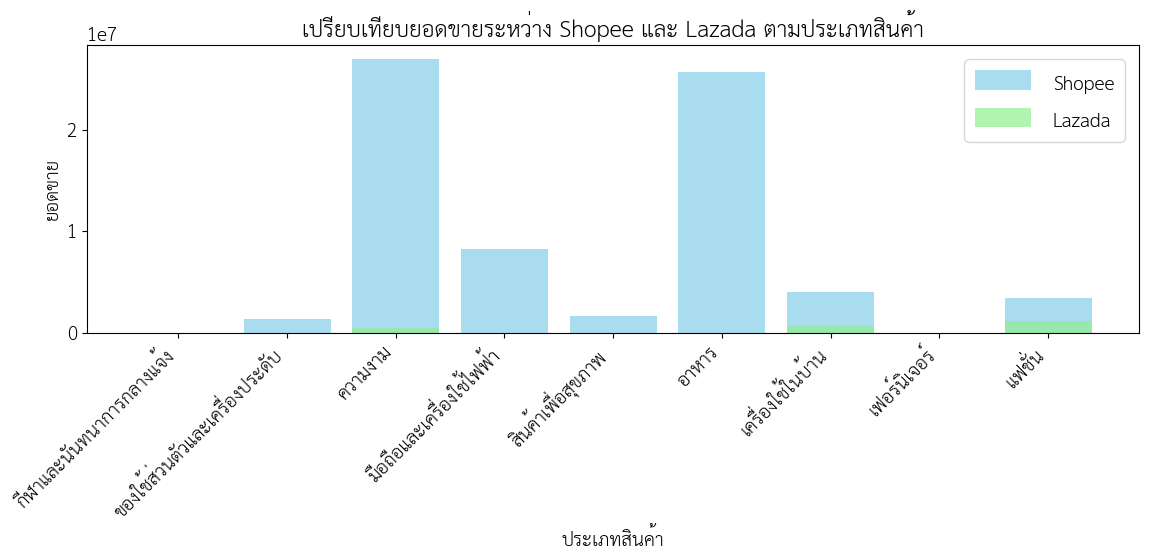

In [78]:
#กราฟเปรียบเทียบ shopee กับ lazada 
# ข้อมูลจาก DataFrame sales_by_type
types1 = sales_by_type['Type']
sold1 = sales_by_type['Quantity']

# ข้อมูลจาก DataFrame sales_by_type_lazada
types2 = sales_by_type_lazada['Type']
sold2 = sales_by_type_lazada['Quantity']  # ขอใช้ข้อมูลจำนวนสินค้าของ Lazada แทนยอดขาย

# สร้างกราฟแท่งเปรียบเทียบ
plt.figure(figsize=(12, 6))

# กราฟแท่งสำหรับยอดขายจาก DataFrame sales_by_type
plt.bar(types1, sold1, color='skyblue', alpha=0.7, label='Shopee')

# กราฟแท่งสำหรับยอดขายจาก DataFrame sales_by_type_lazada
plt.bar(types2, sold2, color='lightgreen', alpha=0.7, label='Lazada')

# เพิ่มชื่อแกน
plt.xlabel('ประเภทสินค้า')
plt.ylabel('จำนวนสินค้า')
plt.title('เปรียบเทียบยอดขายระหว่าง Shopee และ Lazada ตามประเภทสินค้า')
plt.xticks(rotation=45, ha='right')

# เพิ่มคำอธิบายแท่งกราฟ
plt.legend()

# แสดงกราฟ
plt.tight_layout()
plt.show()

In [83]:
# สร้าง DataFrame ใหม่เฉพาะคอลัมน์ "Quantity" ที่มีคำว่า "แฟชั่น" ในคอลัมน์ "Type"
df_furniture = lazada_product[lazada_product['Type'] == 'เฟอร์นิเจอร์'].copy()

# รีอินเด็กซ์ใหม่
df_furniture.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
df_furniture.to_csv('df_furniture.csv', index=False)

# แสดง DataFrame ใหม่
df_furniture

,Product,Price,Quantity,Address,Type


In [ ]:
Type	Quantity
0	กีฬาและนันทนาการกลางแจ้ง	3952
1	ความงาม	492174
2	มือถือและเครื่องใช้ไฟฟ้า	80035
3	สินค้าเพื่อสุขภาพ	3488
4	เครื่องใช้ในบ้าน	759641
5	แฟชั่น	1185788


In [86]:
# สร้าง DataFrame ใหม่เฉพาะคอลัมน์ "Quantity" ที่มีคำว่า "แฟชั่น" ในคอลัมน์ "Type"
sport_df = lazada_product[lazada_product['Type'] == 'กีฬาและนันทนาการกลางแจ้ง'].copy()

# รีอินเด็กซ์ใหม่
sport_df.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
sport_df.to_csv('sport_df.csv', index=False)

# แสดง DataFrame ใหม่
sport_df

,Product,Price,Quantity,Address,Type
0,กระบอกน้ำ2ลิตร ขวดน้ํา พร้อมหลอด วัสดุพีซีคุณภ...,51.0,3952,กรุงเทพมหานคร,กีฬาและนันทนาการกลางแจ้ง


In [87]:
beatiful_df = lazada_product[lazada_product['Type'] == 'ความงาม'].copy()

# รีอินเด็กซ์ใหม่
beatiful_df.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
beatiful_df.to_csv('beatiful_df.csv', index=False)

# แสดง DataFrame ใหม่
beatiful_df

,Product,Price,Quantity,Address,Type
0,ครีมรักแร้88 สินค้าขายดี🥇ปริมาณ35กรัม,98.00,3,ฉะเชิงเทรา,ความงาม
1,ดิกกี้ขาต่อคละสี สีดำสีครีมสีเบจ สีกรม สินค้าข...,158.86,84,บุรีรัมย์,ความงาม
2,[แชมพูปิดผมขาวแม่สุนารี] ดีแฮร์ Dhair แชมพูปิด...,27.02,167,นนทบุรี,ความงาม
3,[แชมพูปิดผมขาวแม่สุนารี] ดีแฮร์ Dhair แชมพูปิด...,32.00,22,กรุงเทพมหานคร,ความงาม
4,แป้งฝุ่นทาหน้าเนื้อเนียนละเอียด ไม่มีสี ไม่โบ๊...,69.18,22,กรุงเทพมหานคร,ความงาม
...,...,...,...,...,...
974,M319 BLAK NANA บลัชออนเนื้อครีมสีสวย น่ารัก 3...,32.00,18,สมุทรสาคร,ความงาม
975,CmaaDu กำมะหยี่ลิปเคลือบริมฝีปากอากาศกำมะหยี่เ...,28.00,9,ต่างประเทศ,ความงาม
976,[Original] O.TWO.O Makeup Blush Stick Hydratin...,148.00,55,ต่างประเทศ,ความงาม
977,ลิปหยดน้ำมันไขมันแต่งหน้า4มล. ลิปกลอสดูแลความช...,36.00,3,ต่างประเทศ,ความงาม


In [88]:
electronic_devices_df = lazada_product[lazada_product['Type'] == 'มือถือและเครื่องใช้ไฟฟ้า'].copy()

# รีอินเด็กซ์ใหม่
electronic_devices_df.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
electronic_devices_df.to_csv('electronic_devices_df.csv', index=False)

# แสดง DataFrame ใหม่
electronic_devices_df

,Product,Price,Quantity,Address,Type
0,สินค้าขายดี!!! ลำโพงบลูทูธ เสียงดี เบสหนัก ทรง...,175.0,41,สมุทรสาคร,มือถือและเครื่องใช้ไฟฟ้า
1,ของมันต้องมี NEW!!! ลำโพงบลูทูธ รุ่น MN36 ดีไซ...,699.0,53,สมุทรสาคร,มือถือและเครื่องใช้ไฟฟ้า
2,สินค้าขายดี! ลำโพงบลูทูธ ดอก12นิ้ว ดังสะใจ ฟัง...,970.0,438,กรุงเทพมหานคร,มือถือและเครื่องใช้ไฟฟ้า
3,New!! (สินค้าขายดีอันดับ1) ลำโพงบลูทูธไร้สายพก...,198.0,660,กรุงเทพมหานคร,มือถือและเครื่องใช้ไฟฟ้า
4,สินค้าขายดี ลำโพงบลูทูธ KTX-1203 ดอกลำโพง6.5นิ...,271.0,1,กรุงเทพมหานคร,มือถือและเครื่องใช้ไฟฟ้า
...,...,...,...,...,...
105,สินค้า​ขายดี​ พร้อมส่งในไทย สีเจลทาเล็บ ยาทาเล...,37.0,35,กรุงเทพมหานคร,มือถือและเครื่องใช้ไฟฟ้า
106,ABL เตาปิ้งย่างไฟฟ้า🔥[จัดส่งที่รวดเร็ว]🔥หม้อชา...,369.0,161,สมุทรปราการ,มือถือและเครื่องใช้ไฟฟ้า
107,สินค้าขายดีเป็นพิเศษ มีดโกนไฟฟ้า มีดโกนผมเด็ก ...,139.0,186,สมุทรปราการ,มือถือและเครื่องใช้ไฟฟ้า
108,ที่วางมือถือ ที่วางโทรศัพท์มือถือ แท่นวางมือถื...,31.2,45,นครปฐม,มือถือและเครื่องใช้ไฟฟ้า


In [89]:
healty_product_df = lazada_product[lazada_product['Type'] == 'สินค้าเพื่อสุขภาพ'].copy()

# รีอินเด็กซ์ใหม่
healty_product_df.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
healty_product_df.to_csv('healty_product_df.csv', index=False)

# แสดง DataFrame ใหม่
healty_product_df

,Product,Price,Quantity,Address,Type
0,ส่งฟรี Hulk ฮัค อาหารเสริม ช ไม่ระบุชื่อสินค้า...,350.00,645,นนทบุรี,สินค้าเพื่อสุขภาพ
1,หมอนรองคอ หมอนรองคอหลากสี พร้อมกระดุมล็อค หมอน...,33.00,1001,นครปฐม,สินค้าเพื่อสุขภาพ
2,♦️สินค้าขายดี | ของแท้ ♦️โกโก้ลิโซ่ ลิโซ่โกโก้...,99.00,1427,ปัตตานี,สินค้าเพื่อสุขภาพ
3,ผลิตภัณฑ์อาหารเสริม X6 Plus Hard IRONโปร ขายดี...,133.44,4,พะเยา,สินค้าเพื่อสุขภาพ
4,(ปิดชื่อสินค้า) ผลิตภัณฑ์เสริมอาหาร X6 Plus Ha...,159.00,27,พะเยา,สินค้าเพื่อสุขภาพ
5,X6 Plus X6พลัส เอ็กซ์ 6 พลัส ฮาร์ด อาหารเสริม ...,133.44,3,พะเยา,สินค้าเพื่อสุขภาพ
6,[1 แถม 1 ของแท้ 💯 ] อาหารเสริมชาย X6 Plus 💥 สิ...,241.53,42,พะเยา,สินค้าเพื่อสุขภาพ
7,สินค้าขายดี | ของแท้ ลิโซ่ + พลัส โกโก้ โกโก้...,95.00,89,นนทบุรี,สินค้าเพื่อสุขภาพ
8,สินค้าขายดี KIngdom เบาะรองหลังเพื่อสุขภาพ หมอ...,139.00,250,ปทุมธานี,สินค้าเพื่อสุขภาพ


In [90]:

Home_appliances = lazada_product[lazada_product['Type'] == 'เครื่องใช้ในบ้าน'].copy()

# รีอินเด็กซ์ใหม่
Home_appliances.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
Home_appliances.to_csv('Home_appliances.csv', index=False)

# แสดง DataFrame ใหม่
Home_appliances

,Product,Price,Quantity,Address,Type
0,ไม้ถูพื้น ไม้ม๊อบ ถังถูพื้น ไม้ม๊อบถูพื้น ไม้ม...,90.15,32389,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
1,KUMALL ไม้ถูพื้น Spin Mop ชุดถังปั่นม๊อบสแตนเล...,105.00,12172,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
2,Spin Mop ไม้ถูพื้น (เฉพาะด้าม)หมุนได้ 360 องศ...,52.00,615,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
3,ไม้ถูพื้นถังปั่น มีผ้าถูพื้น 2 ชิ้น มีล้อในตัว...,99.02,5805,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
4,KUMALL ไม้ถูพื้น Spin Mop ALLNEW ชุดถังปั่นม๊อ...,102.60,14588,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
...,...,...,...,...,...
697,พร้อมส่งจากไทย🎉บราเล็ตบราลูกไม้สายเดี่ยว งานลู...,138.36,460,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
698,[ส่งเร็ว] ✨Kaykai_Shop✨❗พร้อมส่ง🚚 สไตล์เกาหลี...,55.00,556,สมุทรสาคร,เครื่องใช้ในบ้าน
699,AVAFASHION🧸ครอปท็อป สายเดี่ยวไขว้หน้า เว้าอกสุ...,22.00,912,กรุงเทพมหานคร,เครื่องใช้ในบ้าน
700,Becoolman - แขนสั้นผู้ชายผ้าวาฟเฟิล คอวีสไตล์เ...,111.84,165,กรุงเทพมหานคร,เครื่องใช้ในบ้าน


In [91]:

fashion_df = lazada_product[lazada_product['Type'] == 'แฟชั่น'].copy()

# รีอินเด็กซ์ใหม่
fashion_df.reset_index(drop=True, inplace=True)

# นำ DataFrame ออกเป็น CSV
fashion_df.to_csv('fashion_df.csv', index=False)

# แสดง DataFrame ใหม่
fashion_df

,Product,Price,Quantity,Address,Type
0,QiaoYiLuo ขายดี💜จัดส่งทุกวัน รองเท้าผ้าใบผช ร...,79.00,3691,ฉะเชิงเทรา,แฟชั่น
1,🔥สินค้าขายดี🔥กระเป๋าผู้หญิง Tintinfashion กระเ...,32.00,8632,สมุทรปราการ,แฟชั่น
2,[10-30 ชิ้น] ไม้แขวนเสื้อ ไม้แขวนเสื้อสแตนเลส ...,25.93,33188,กรุงเทพมหานคร,แฟชั่น
3,เสื้อยืดแขนสั้นพร้อมส่ง 10สี ลายการ์ตูน ขายดีต...,29.00,1242,สมุทรสาคร,แฟชั่น
4,เสื้อยืด เสื้อยืดมือสอง เสื้อยืดแขนสั้น ไม่มีต...,8.72,4270,กรุงเทพมหานคร,แฟชั่น
...,...,...,...,...,...
2798,Beautifultime ชุดเดรสยาวลายดอกไม้สายเดี่ยวฤดูร...,184.00,35,ต่างประเทศ,แฟชั่น
2799,"Beautifultime ชุดสตรี,แขนกุด Sequined Patchwor...",200.00,48,ต่างประเทศ,แฟชั่น
2800,Beautifultimeชุดชั้นในสตรีแฟชั่นสองชิ้นตาข่ายส...,77.00,17,ฉะเชิงเทรา,แฟชั่น
2801,เสื้อแฟชั่น มือสอง ถ่ายจากสินค้าจริงทุกตัว,59.00,4,สกลนคร,แฟชั่น
